In [11]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go

df = pd.read_csv("Data/Data.csv")
df["OrderDate"] = pd.to_datetime(df["OrderDate"])     # 날짜 타입으로 만들어주기
df["year"] = df["OrderDate"].dt.year
df["month"] = df["OrderDate"].dt.month        # 연과 월 뽑아내기
df

,OrderID,OrderDate,Gender,AgeGroup,Channel,ShipDate,ItemCode,MapCode,Quantity,Revenue,...,Category,Item Type,Region,Country,Code2,Code3,Latitude,Longitude,year,month
0,100013196,2020-03-20,Female,30s,Online,2020-03-22,D10002,34,46,35576.60,...,Office,Office Supplies,Asia,Taiwan,TW,TWN,23.697810,120.960515,2020,3
1,100061261,2018-06-20,Female,50s,Offline,NaN,D10001,5,69,10222.80,...,Home,Household,Asia,China,CN,CHN,35.861660,104.195397,2018,6
2,100071990,2020-06-20,Female,20s,Online,2020-06-22,D10001,3,53,31731.50,...,Home,Household,Europe,Belgium,BE,BEL,50.503887,4.469936,2020,6
3,100074136,2019-04-12,Male,40s,Online,2019-04-15,C10003,31,84,30739.60,...,Foods,Vegetables,Asia,South Korea,KR,KOR,35.907757,127.766922,2019,4
4,100103318,2018-03-27,Male,30s,Offline,NaN,C10004,7,56,62652.90,...,Foods,Fruits,America,Cuba,CU,CUB,21.300000,-80.000000,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27652,999944102,2018-04-23,Male,30s,Offline,NaN,D10002,5,55,30235.45,...,Office,Office Supplies,Asia,China,CN,CHN,35.861660,104.195397,2018,4
27653,999951398,2018-02-18,Female,30s,Online,2018-02-25,C10002,38,63,12194.19,...,Foods,Beverages,Europe,United Kingdom,GB,GBR,51.513330,-0.088947,2018,2
27654,999998605,2018-11-25,Female,60s,Offline,2018-11-25,B10001,4,57,21593.28,...,Clothes,Clothes,America,Canada,CA,CAN,45.423494,-75.697933,2018,11
27655,999999463,2020-09-02,Female,40s,Online,2020-09-07,C10006,5,44,36596.83,...,Foods,Cereal,Asia,China,CN,CHN,35.861660,104.195397,2020,9


# 히스토그램 & 자리할당 - Histogram, make_subplots

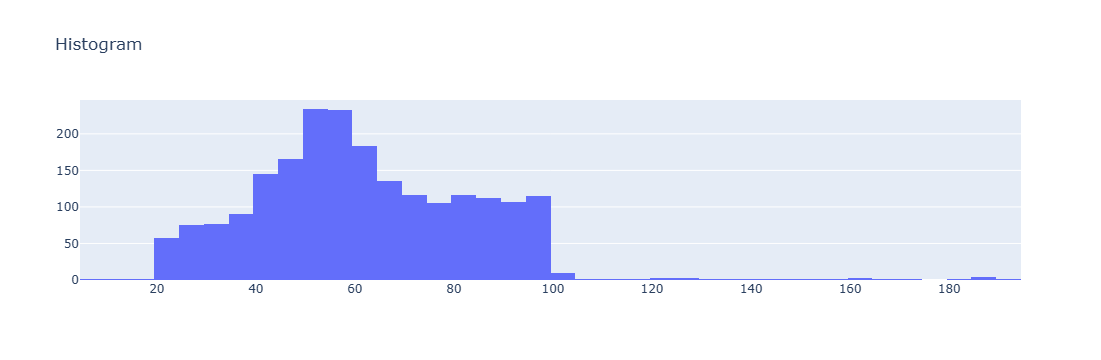

In [12]:
# 히스토그램 & 자리할당

df20 = df[df["year"] == 2020][["AgeGroup", "Quantity"]]
sample = df20[df20["AgeGroup"] == "20s"]

A = go.Histogram(x = sample["Quantity"])

data = [A]
layout = go.Layout(title = "Histogram")

fig = go.Figure(data, layout)
fig.show()

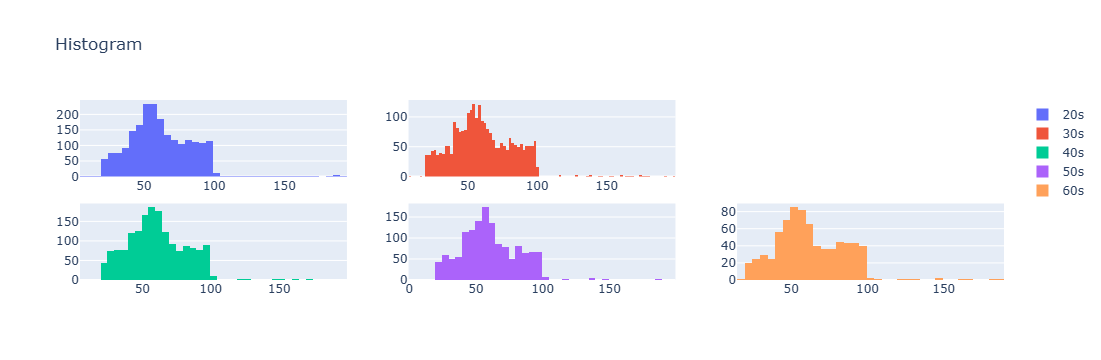

In [13]:
from plotly.subplots import make_subplots    # 자리 할당

fig = make_subplots(rows = 2, cols = 3)

box = []
for i in sorted(df20["AgeGroup"].unique()):
    box.append(go.Histogram(x = df20[df20["AgeGroup"] == i]["Quantity"],         # 각 나이대별로 히스토그램 넣어놓음
                            name = i))
    
fig.append_trace(box[0], 1, 1)    # 1행 1열 자리에 box[0]의 히스토그램 그린다
fig.append_trace(box[1], 1, 2)
fig.append_trace(box[2], 2, 1)
fig.append_trace(box[3], 2, 2)
fig.append_trace(box[4], 2, 3)      # 3행으로는 안되는듯?
fig.update_layout(title = "Histogram")
fig.show()

# 방사형(레이더) 차트 - Scatterpolar

In [6]:
# 방사형(레이더) 차트
df_g = df.groupby(["year", "Category"])["Revenue"].sum().reset_index()
df_g["Rank"] = 0

df_g.loc[df_g["Revenue"] < 10000000, "Rank"] = 1                                        # 매출액이 1000만원보다 작을때 Rank에 1 넣기 
df_g.loc[(df_g["Revenue"] >= 10000000) & (df_g["Revenue"] < 30000000), "Rank"] = 2        # 매출액이 1000만원 이상 3000만원 미만일때 Rank에 2 넣기 
df_g.loc[(df_g["Revenue"] >= 30000000) & (df_g["Revenue"] < 50000000), "Rank"] = 3        # 매출액이 3000만원 이상 5000만원 미만일때 Rank에 3 넣기 
df_g.loc[(df_g["Revenue"] >= 50000000) & (df_g["Revenue"] < 70000000), "Rank"] = 4        # 매출액이 5000만원 이상 7000만원 미만일때 Rank에 4 넣기 
df_g.loc[df_g["Revenue"] >= 70000000, "Rank"] = 5                                        # 매출액이 7000만원 이상일때 Rank에 5 넣기 
df_g

,year,Category,Revenue,Rank
0,2017,Beauty & Health,2.328379e+07,2
1,2017,Clothes,5.119862e+07,4
2,2017,Foods,7.110853e+07,5
3,2017,Home,1.288006e+07,2
4,2017,Office,1.249311e+07,2
5,2018,Beauty & Health,3.910164e+07,3
6,2018,Clothes,4.644149e+07,3
7,2018,Foods,6.622514e+07,4
8,2018,Home,1.259541e+07,2
9,2018,Office,6.724845e+06,1


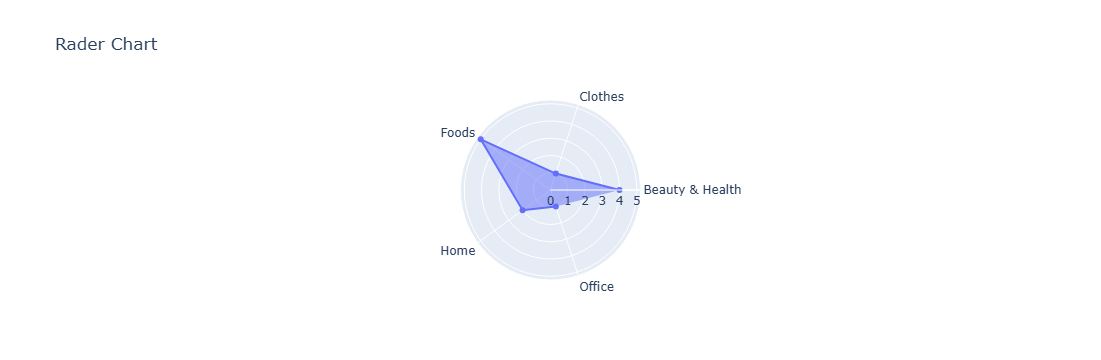

In [35]:
df20 = df_g[df_g["year"] == 2020]

A = go.Scatterpolar(r = df20["Rank"],
                theta = df20["Category"],
                fill = "toself",
                name = "2020")

data = [A]
layout = go.Layout(title = "Rader Chart")

fig = go.Figure(data, layout)
fig.show()

In [38]:
# 방사형차트의 마지막선도 이어지게 하려면 

# 마지막 변수 첫번째 자리에 하나더 추가하는 법

ranks = list(df20["Rank"])
ranks.append(ranks[0])

thetas = list(df20["Category"])
thetas.append(thetas[0])
thetas

['Beauty & Health', 'Clothes', 'Foods', 'Home', 'Office', 'Beauty & Health']

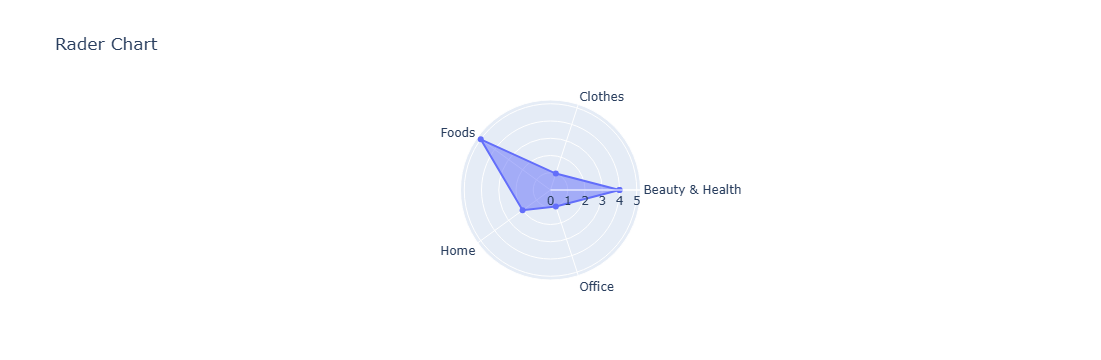

In [41]:
A = go.Scatterpolar(r = ranks,
                theta = thetas,
                fill = "toself",
                name = "2020")

data = [A]
layout = go.Layout(title = "Rader Chart")

fig = go.Figure(data, layout)
fig.show()

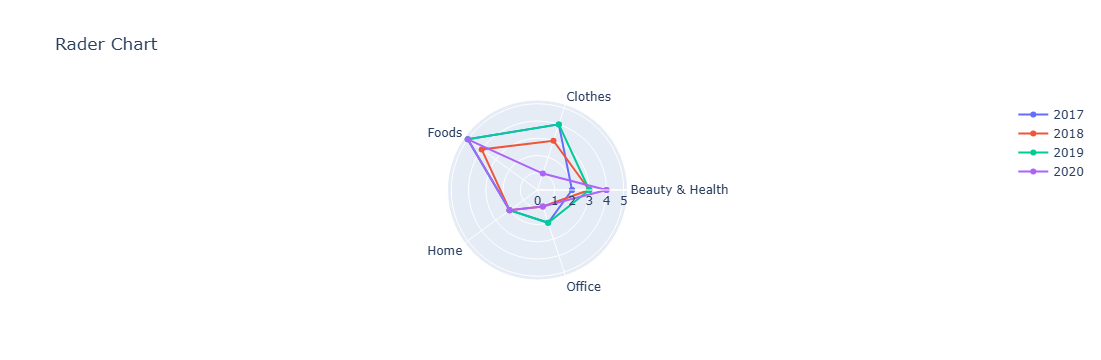

In [7]:
# 연도별 방사형 레이더 차트 겹쳐서 그리기

# 내가
box = []
for i in df_g['year'].unique():
    A = df_g[df_g['year'] == i]
    
    ranks = list(A["Rank"])
    ranks.append(ranks[0])
    
    thetas = list(A["Category"])
    thetas.append(thetas[0])
    
    box.append(go.Scatterpolar(r = ranks,
                           theta = thetas,
                            #fill = "toself",
                            name = str(i)))

layout = go.Layout(title = "Rader Chart")

fig = go.Figure(box, layout)
fig.show()

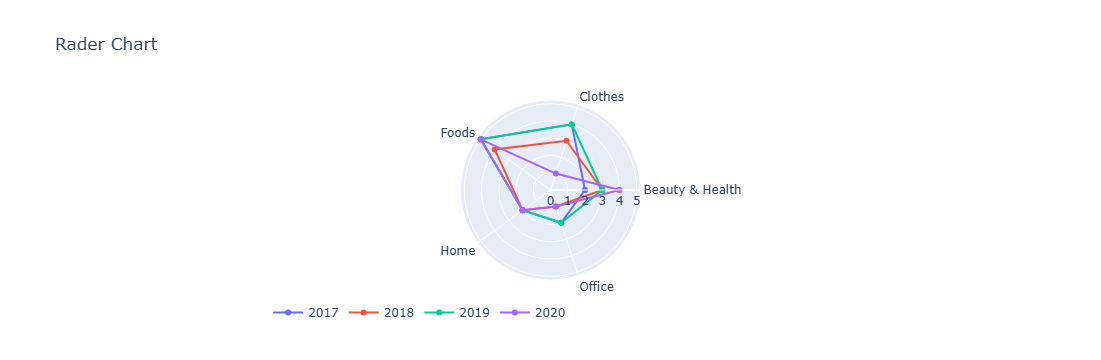

In [51]:
# 강사님

# 연도별 방사형 레이더 차트 겹쳐서 그리기

box = []
for i in df_g['year'].unique():
    sample = df_g[df_g['year'] == i]
    
    ranks = list(sample["Rank"])
    ranks.append(ranks[0])
    
    thetas = list(sample["Category"])
    thetas.append(thetas[0])
    
    box.append(go.Scatterpolar(r = ranks, theta = thetas,
                            name = str(i)))

layout = go.Layout(title = "Rader Chart", legend_orientation = "h",
                   legend = dict(x = 0.2, y = -0.1))
fig = go.Figure(box, layout)
fig.show()

# 인디케이터

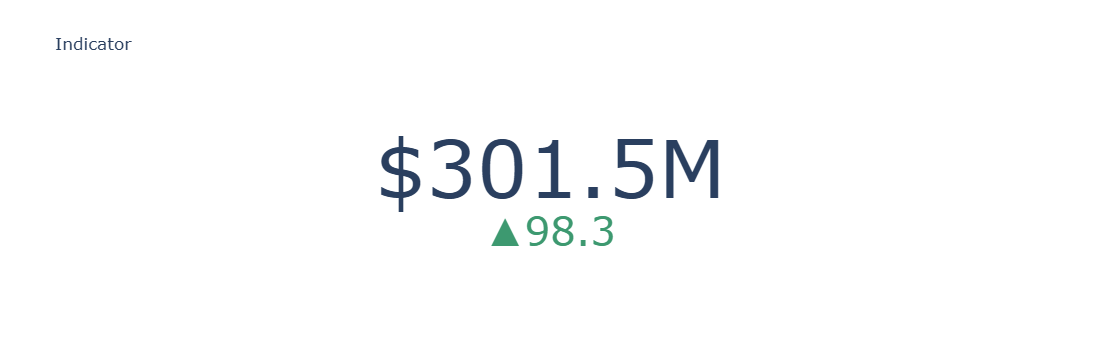

In [15]:
# 인디케이터 그리기

df["Margin"] = df["Revenue"] - df["Cost"]
df20 = df[df["year"] == 2020]

df_g1 = round(df20[["Revenue", "Margin"]].sum() / 1000000, 2)

values = df_g1["Revenue"]
deltas = df_g1["Revenue"] - df_g1["Margin"]

A = go.Indicator(mode = "number+delta", value = values, 
                 number = dict(prefix = "$", suffix = "M"),             # 앞에 달러 붙여라, 뒤에 M 붙여라 
                 delta = dict(reference = deltas))

data = [A]
layout = go.Layout(title = "Indicator")

fig = go.Figure(data, layout)
fig.show()